# FIT5202 Data processing for big data

# Activity: Streaming Data using Apache Kafka

In this activity, we are going to discuss Apache Kafka and how Spark streaming programmers can use it for building distributed systems. Apache Kafka® is a distributed streaming platform. It is an open-source streaming platform that was initially built by LinkedIn. It was later handed over to Apache foundation and open sourced it in 2011.

## 1. Overview ##

### 1.1 What is Apache Kafka?

According to Wikipedia:

Apache Kafka is an open-source stream-processing software platform developed by the Apache Software Foundation, written in Scala and Java. The project aims to provide a unified, high-throughput, low-latency platform for handling real-time data feeds. Its storage layer is essentially a “massively scalable pub/sub message queue architected as a distributed transaction log,” making it highly valuable for enterprise infrastructures to process streaming data. Additionally, Kafka connects to external systems (for data import/export) via Kafka Connect and provides Kafka Streams, a Java stream processing library.

Think of it is a big commit log where data is stored in sequence as it happens. The users of this log can just access and use it as per their requirement.

### 1.2 Kafka Use Cases
Uses of Kafka are multiple. Here are a few use-cases that could help you to figure out its usage.

- #### Messaging
Kafka can be used as a message broker among services. If you are implementing a microservice architecture, you can have a microservice as a producer and another as a consumer. For instance, you have a microservice that is responsible to create new accounts and other for sending email to users about account creation.

- #### Activity Monitoring
Kafka can be used for activity monitoring. The activity could belong to a website or physical sensors and devices. Producers can publish raw data from data sources that later can be used to find trends and pattern.

- #### Log Aggregation
Kafka can be used to collect logs from different systems and store in a centralized system for further processing.

- #### Extract Transform and Load (ETL)
Kafka has a feature of almost real-time streaming thus you can come up with an ETL based on your need.

- #### Database 
Kafka can also acts as a database. It is not a typical databases that have a feature of querying the data as per need, but you can keep data in Kafka as long as you want without consuming it (Message queing).

### 1.3 Kafka Concepts

Let’s discuss some core Kafka concepts.

![Overview of Kafka](https://cdn-images-1.medium.com/max/1600/1*48ck-bvatKzEpVapVa4Mag.png)

#### Topics
Every message that is feed into the system must be part of some *topic*. The topic is nothing but a stream of records. The messages are stored in *key-value* format. Each message is assigned a sequence, called *Offset*. The output of one message could be an input of the other for further processing.

#### Producers
*Producers* are the applications responsible to publish data into Kafka system. They publish data on the *topic* of their choice.

#### Consumers
The messages published into *topics* are then utilized by *Consumer* applications. A *consumer* gets subscribed to the *topic* of its choice and consumes data.

#### Broker
Every instance of Kafka that is responsible for message exchange is called a *Broker*. Kafka can be used as a stand-alone machine or a part of a cluster.

### 1.4 Setting up and Running

The easiest way to install Kafka is to download binaries and run it. Since it’s based on JVM languages like Scala and Java, you must make sure that you are using Java 7 or greater. 
If you want to setup Apache Kafka in your personal machine, you can find the tutorial [here](https://kafka.apache.org/quickstart).

*Note: For simplicity, the virtual machines (VM) provided to the students and used in the labs have been configured to run Apache Kafka during the start up of the operating system. *

### 1.5 Accessing Kafka in Python
There are multiple python libraries available to connect Apache Kafka and Python together. We are going to use 
an open-source community-based library known as [Kafka-Python](https://github.com/dpkp/kafka-python).

You can install the library using the command below:
>  **!pip3 install kafka-python**

*Note: This is a python library that facilitates accessing Apache Kafka Producer and Consumer. We will see how we can access Kafka Producer from Apache Spark Streaming in the next section.*

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px">    
<strong style="color:red">NOTE:</strong> Apache Kafka is already installed in the provided VM image. However, it is not enabled. Perform the following steps to start Apache Kafka Service:
    <ol>
        <li>Open a new terminal in Ubuntu</li>
        <li>Type the command <code>sudo systemctl status kafka.service</code> This will show the status of kafka-service in the VM</li>
        <li>To start Kafka run the command <code>sudo systemctl start kafka.service</code></li>
        <li>You can perform Step 2. again to check if the service is now running.</li>
    </ol>
    
</div>.


## 2. Streaming Scenarios ##

Now, we will look into different scenarios on handling data streams as they come. We are not going to process or store data, but just display the data on the fly.

### Producer
A producer <code>2.Kafka_producer.ipynb</code> is provided, which continiously streams data (i.e. timestamp and a random count) to a topic **Week9-Topic**. For each of the following scenarios, a separate consumer is implemented in Kafka which subscribes the topic and performs various analysis and visualizations.

**Run this file first before starting the other consumers**

### Scenario #01
The incoming data has uniform arrival. The data comes, and we display it in the graph. For simplicity, we assume that the incoming data is within a specified range, so it will be easy to prepare the display because we know the max (and the min) of y-axis and the x-axis is the arrival time. This is a line graph.

Run the following file to see the real-time plotting in action.
- <code>3.Kafka_Consumer01.ipynb</code>

### Scenario #02
We want to improve the graph in Scenario 01 by showing the label of some interesting points such as minimum and maximum values.
Run the following file in to see the real-time plotting in action.
- <code>4. Kafka_Consumer02.ipynb</code>

### Scenario #03
Scenario 01 and 02 assumes that the incoming data is uniform in terms of their arrivals. Now, how about if the incoming data is bursty. The interval between data is not uniform. The *creation time* in the producer will be different from the *arrival time* in the consumer. 
Run the following file to see the real-time plotting in action.
- <code>5. Kafka_Consumer03.ipynb</code>

### Scenario #04
We want to do some simple processing of the incoming data on the fly.  The data source is still one but we want to show the second line graph which is the value of moving window (such as moving average). So the moving average of the current time is the average value of, for example, the previous 5 values. 
Run the following file to see the real-time plotting in action.
- <code>6. Kafka_Consumer04.ipynb</code>

### Scenario #05
Now lets consider we have multiple data sources (say for example 3 producers). We want to plot data from all three producers as well as average of data from all three producers at the given time. So, in total, we will have 4 graphs. 
Run the following files in sequential order to see the real-time plotting in action.
- <code>7. Kafka_Multiple_Producers.ipynb</code>
- <code>8. Kafka_Consumer05.ipynb</code>

<h3><strong style="color:red">Plots cutting off partially</strong></h3>

If the plots in Kafka-consumer are cut and only displaying partially, Uninstall matplotlib (Run the following command in jupyter cell)

<code>!pip uninstall matplotlib --yes</code>

<code>!pip install matplotlib</code>

<div style="background:rgba(164,0,255,0.2);padding:10px;border-radius:4px">
    <strong style="color:rgba(164,0,255,0.8)">NOTE:</strong> These tutorials and lab tasks are very significant for understanding and completing Assignment 2-Part B.
</div>

<a class="anchor" id="lab-task-1"></a>
<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong style="color:#FF5555">1. Lab Task: </strong> 
    <ol>
        <li>Complete the <strong>Kafka Producer</strong> in the file <code>LT1-Producer.ipynb</code>. Here you are required to address the following conditions:
    <ul>
        <li>Read the data frome the csv file <code>clickstream.csv</code> continiously.</li>
        <li>Add the current timestamp to the data being sent</li>
        <li>Publish <strong>5-10</strong> number of rows randomly every 5 seconds to a topic named:<strong>clickstream</strong>. You can try to produce the data in the following format <strong>(you can choose your own formatting style)</strong>, it represents a single batch, Note how ts i.e. timestamp is added, which will be useful for analysis later:
       <code>
[{'Clicks': '1', 'Impressions': '2', 'ts': 1602508926}, {'Clicks': '0', 'Impressions': '4', 'ts': 1602508926}, {'Clicks': '0', 'Impressions': '5', 'ts': 1602508926}, {'Clicks': '0', 'Impressions': '4', 'ts': 1602508926}, {'Clicks': '0', 'Impressions': '5', 'ts': 1602508926}, {'Clicks': '0', 'Impressions': '6', 'ts': 1602508926}, {'Clicks': '0', 'Impressions': '4', 'ts': 1602508926}]
            </code>
        </li>                                
    </ul>
        <li>Complete the <strong>Kafka Consumer</strong> in the file <code>LT1-Consumer.ipynb</code>. Here you are required address the following requirements:
       <ul>
           <li>Read the incoming data stream in the topic <strong>clickstream</strong></li>
           <li>Generate a real-time visualization showing <strong>number of clicks every minute</strong></li>
            </ul>
    </ol>    
</div>

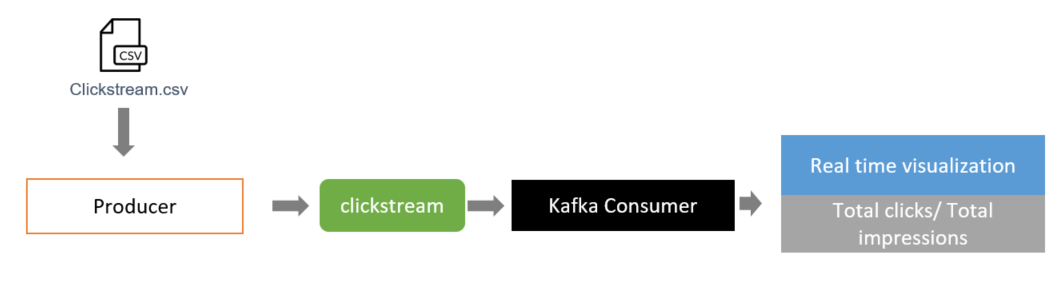


<div style="background:rgba(164,0,255,0.2);padding:10px;border-radius:4px">
    <strong style="color:rgba(164,0,255,0.8)">NOTE:</strong> Details on Spark Streaming will be covered next week. For those who have completed the Kafka Consumer/Producer Lab Task, you can proceed with the second task. It will give you a basic understanding about using Kafka and Spark Streaming together.
</div>

<a class="anchor" id="lab-task-2"></a>
<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong style="color:#FF5555">2. Lab Task: </strong> 
    Create another file <code>LT2-Spark-Click-Stream-Analysis.ipynb</code>. Based on the word-count example for Spark Streaming, use the Kafka-Producer from <code>LT1-Producer.ipynb</code> and ingest the stream to Spark Streaming. Visualize the number of impressions/clicks per minute in realtime. 
</div>

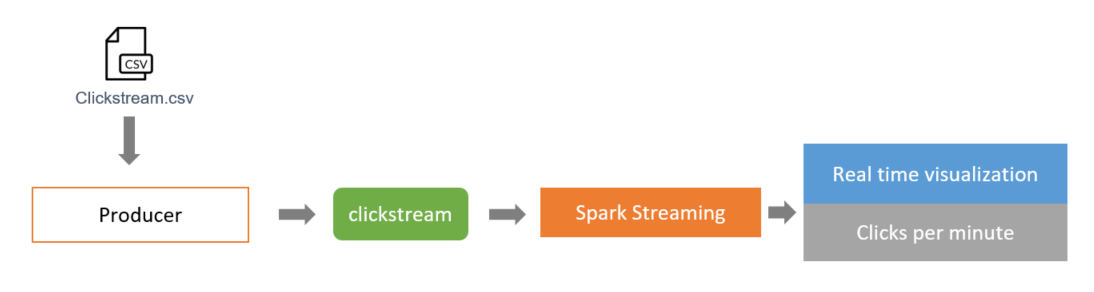